In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import pandas as pd
import matplotlib.pyplot as plt

2024-03-11 23:31:59.026255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 23:32:00.169041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
housing = fetch_california_housing()


X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_val,y_train,y_val=train_test_split(X_train_full,y_train_full)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [23]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])


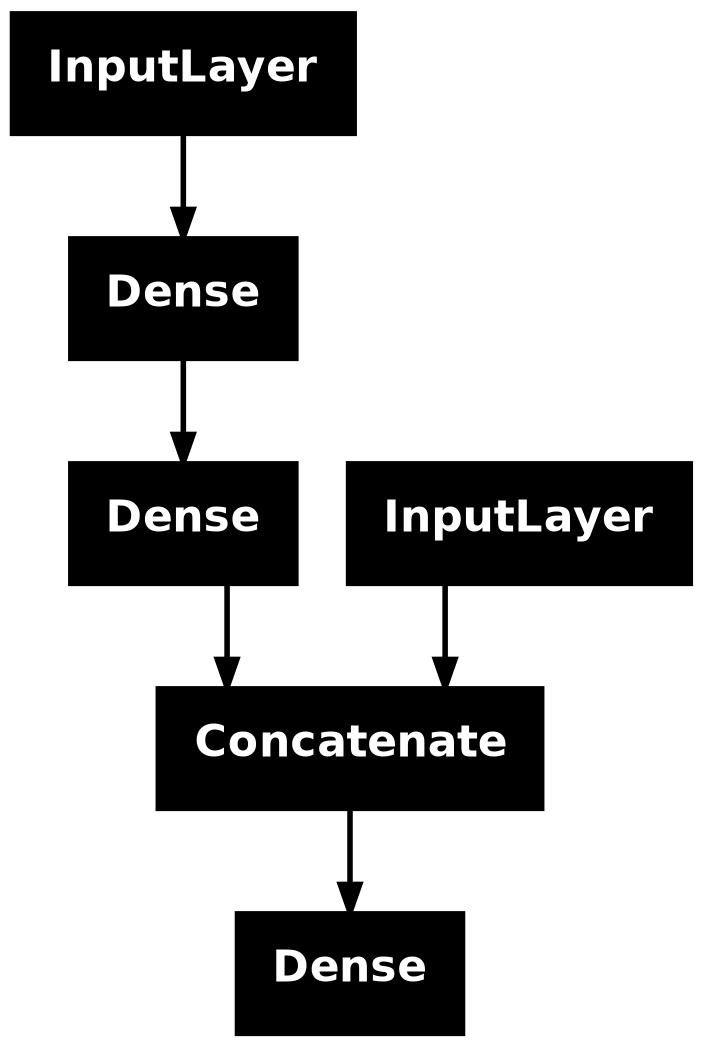

In [36]:
#plotting the layers
from keras.utils import plot_model
plot_model(model)


In [37]:
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=2,validation_data=(X_val,y_val))
mse_test=model.evaluate(X_test,y_test)

Epoch 1/2


ValueError: Layer 'functional_8' expected 2 input(s). Received 1 instead.

In [ ]:
print(mse_test)

0.3832373321056366


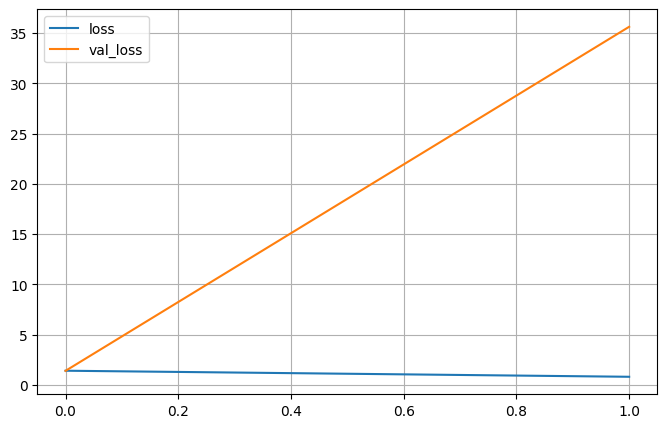

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_test[:3])
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0.799 1.951 3.93 ]
[[0.98166656]
 [2.129847  ]
 [3.6368933 ]]


In [6]:
input_A=keras.layers.Input(shape=[5],name='wide_input')
input_B=keras.layers.Input(shape=[6],name='deep_input')
hidden1=keras.layers.Dense(30,activation='relu')(input_B)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_A,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])


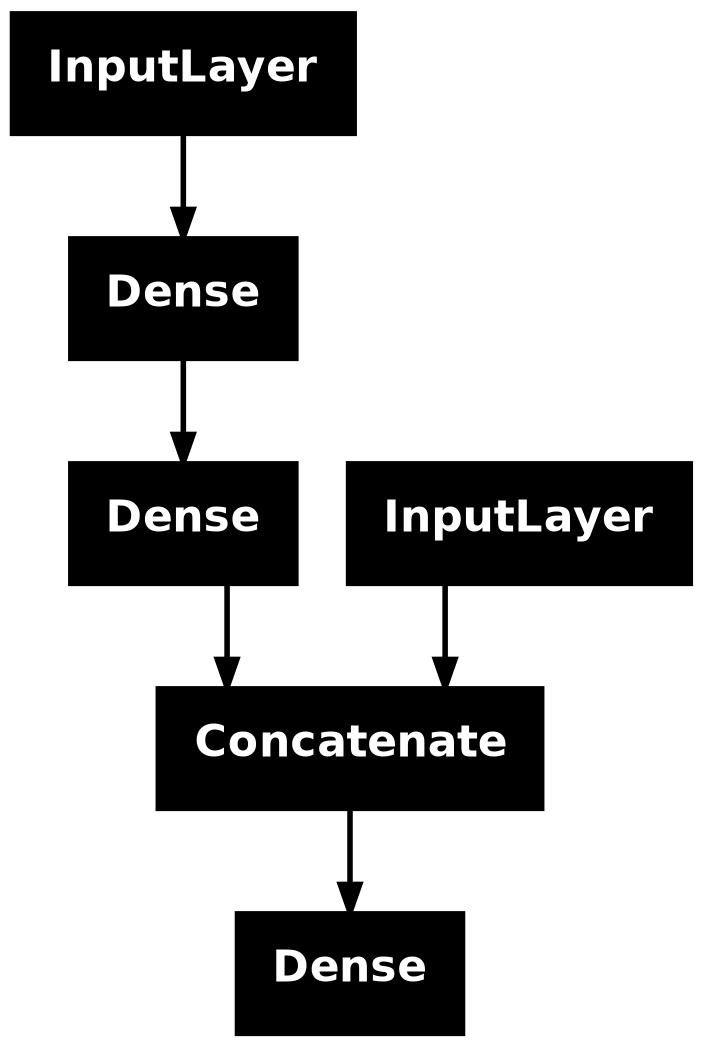

In [ ]:
#plotting the layers
from keras.utils import plot_model
plot_model(model)


In [3]:
# from keras.optimizers import SGD

# # Create SGD optimizer with specified learning rate
# optimizer = SGD(learning_rate=0.001)

# # Compile the model with the specified loss and optimizer
# model.compile(loss='mse', optimizer=optimizer)

# model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate==0.001))

X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_val_A,X_val_B=X_val[:,:5],X_val[:,2:]
X_test_A,X_test_B=X_test[:, :5],X_test[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]


In [44]:
history=model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_val_A,X_val_B),y_val))
mse_test=model.evaluate((X_test_A,X_test_B),y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 3.1629 - val_loss: 0.8384
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.7398 - val_loss: 0.7212
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.6971 - val_loss: 0.6802
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.6658 - val_loss: 0.6536
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.6432 - val_loss: 0.6335
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.6034 - val_loss: 0.6156
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.5845 - val_loss: 0.6021
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.5615 - val_loss: 0.5905
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.5541 - val_loss: 0.5798
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.5620 - val_loss: 0.5710
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.5521 - val_loss: 0.5687
Epoch 12/20
363/363 ━━━━━━━━━━

In [45]:
print(mse_test)

0.4923963248729706


In [50]:
y_pred=model.predict((X_new_A,X_new_B))
print(y_test[:3].reshape(-1,1))
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.799]
 [1.951]
 [3.93 ]]
[[1.1205325]
 [2.216034 ]
 [3.5500364]]


In [8]:
# using auxillary output
input_A=keras.layers.Input(shape=[5],name='wide_input')
input_B=keras.layers.Input(shape=[6],name='deep_input')
hidden1=keras.layers.Dense(30,activation='relu')(input_B)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_A,hidden2])
output=keras.layers.Dense(1,name="main_output")(concat)
aux_output=keras.layers.Dense(1,name='aux_output')(hidden2) #created aux output for giving output using a subset of features passed thorught the deep network
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])


In [9]:
# giving more weight to the main_output as other output is for regularization
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer="sgd")

In [10]:
history=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_val_A,X_val_B],[y_val,y_val]))

Epoch 1/20


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6326 - val_loss: 0.8461
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5815 - val_loss: 0.5803
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5321 - val_loss: 0.5688
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5061 - val_loss: 0.5192
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5517 - val_loss: 0.5488
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5136 - val_loss: 0.4813
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.4719 - val_loss: 0.4824
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.4482 - val_loss: 0.4679
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.4511 - val_loss: 0.4543
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4313 - val_loss: 0.4417
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.4161 - val_loss: 0.5308
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/ste

In [15]:
total_loss=model.evaluate(
    [X_test_A,X_test_B],[y_test,y_test])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.3698


In [16]:
print(total_loss)

0.3688482642173767


In [13]:
y_pred_main,y_pred_aux=model.predict([X_new_A,X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [64]:
print(y_pred_main)
print(y_pred_aux)
print(y_test[:3].reshape(-1,1))

[[1.0324769]
 [2.8398037]
 [3.4722753]]
[[0.86574143]
 [3.3591964 ]
 [3.1252708 ]]
[[0.799]
 [1.951]
 [3.93 ]]
